### Name = Hafidah Dwi Cahyani
### Class = PYTN KS-014

In [1]:
# Untuk membaca data
import pandas as pd
import numpy as np
# Untuk memvisualisasikan data
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
# Processing
# Untuk LabelEncoder
from sklearn import preprocessing
# Untuk train test split
from sklearn.model_selection import train_test_split
# Untuk library logistic regression
from sklearn.linear_model import LogisticRegression
# Modelling 
# Untuk library k-nearest neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier
# Untuk library support vector machine (SVM)
from sklearn.svm import SVC
# Untuk library decision tree
from sklearn.tree import DecisionTreeClassifier
# Untuk library random forest
from sklearn.ensemble import RandomForestClassifier
# Untuk library naive bayes
from sklearn.naive_bayes import GaussianNB
# Untuk library confussion matrix
from sklearn.metrics import confusion_matrix
# Untuk library mendapatkan accuracy score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, precision_score, recall_score
# Untuk paramater yang terbaik
from sklearn.model_selection import GridSearchCV

In [2]:
url = 'https://raw.githubusercontent.com/hafidahdc/PYTN_Assgn_3_4_003_HafidahDwiCahyani/main/bank-additional-full.csv'


In [3]:
databank = pd.read_csv(url, sep=';')

In [4]:
databank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
databank.shape

(41188, 21)

In [6]:
databank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [7]:
databank = databank.rename(columns={'default':'credit status', 'housing':'credit housing', 'month':'last contact of month', 
                        'day_of_week':'last contact of week','campaign':'total contact of campaign','pdays':'total days of last contact',
                        'previous':'total contact before campaign','poutcome':'result of campaign',
                        'emp.var.rate':'rate job variations', 'cons.price.idx':'customer price index',
                        'cons.conf.idx':'customer confidence index','euribor3m':'euribor level',
                        'nr.employed':'number of employees','y':'deposit'})

databank.head()

,age,job,marital,education,credit status,credit housing,loan,contact,last contact of month,last contact of week,...,total contact of campaign,total days of last contact,total contact before campaign,result of campaign,rate job variations,customer price index,customer confidence index,euribor level,number of employees,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
databank.columns.values

array(['age', 'job', 'marital', 'education', 'credit status',
       'credit housing', 'loan', 'contact', 'last contact of month',
       'last contact of week', 'duration', 'total contact of campaign',
       'total days of last contact', 'total contact before campaign',
       'result of campaign', 'rate job variations',
       'customer price index', 'customer confidence index',
       'euribor level', 'number of employees', 'deposit'], dtype=object)

In [9]:
# melihat kolom keseluruhan
pd.set_option("display.max.columns", None) 
databank.head()

,age,job,marital,education,credit status,credit housing,loan,contact,last contact of month,last contact of week,duration,total contact of campaign,total days of last contact,total contact before campaign,result of campaign,rate job variations,customer price index,customer confidence index,euribor level,number of employees,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Data Cleaning
-----

In [10]:
# melihat data yang kosong
databank.isnull().values.any()

False

In [11]:
# data yang berisi nol
databank.isnull().sum()

age                              0
job                              0
marital                          0
education                        0
credit status                    0
credit housing                   0
loan                             0
contact                          0
last contact of month            0
last contact of week             0
duration                         0
total contact of campaign        0
total days of last contact       0
total contact before campaign    0
result of campaign               0
rate job variations              0
customer price index             0
customer confidence index        0
euribor level                    0
number of employees              0
deposit                          0
dtype: int64

In [12]:
# melihat data yang terduplikasi
databank.duplicated().sum()

12

In [13]:
# Menghapus data duplikat
databank.drop_duplicates(keep='first', inplace=True)

In [14]:
databank.head()

,age,job,marital,education,credit status,credit housing,loan,contact,last contact of month,last contact of week,duration,total contact of campaign,total days of last contact,total contact before campaign,result of campaign,rate job variations,customer price index,customer confidence index,euribor level,number of employees,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [15]:
databank.tail()

,age,job,marital,education,credit status,credit housing,loan,contact,last contact of month,last contact of week,duration,total contact of campaign,total days of last contact,total contact before campaign,result of campaign,rate job variations,customer price index,customer confidence index,euribor level,number of employees,deposit
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [16]:
# mengecek tipe data
databank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41176 non-null  int64  
 1   job                            41176 non-null  object 
 2   marital                        41176 non-null  object 
 3   education                      41176 non-null  object 
 4   credit status                  41176 non-null  object 
 5   credit housing                 41176 non-null  object 
 6   loan                           41176 non-null  object 
 7   contact                        41176 non-null  object 
 8   last contact of month          41176 non-null  object 
 9   last contact of week           41176 non-null  object 
 10  duration                       41176 non-null  int64  
 11  total contact of campaign      41176 non-null  int64  
 12  total days of last contact     41176 non-null 

In [17]:
kol_num = list(databank.select_dtypes(include=['int64']).columns.values) + list(databank.select_dtypes(include=['float64']).columns.values)
kol_kat = list(databank.select_dtypes(include=['object']))

In [18]:
kol_num

['age',
 'duration',
 'total contact of campaign',
 'total days of last contact',
 'total contact before campaign',
 'rate job variations',
 'customer price index',
 'customer confidence index',
 'euribor level',
 'number of employees']

In [19]:
kol_kat

['job',
 'marital',
 'education',
 'credit status',
 'credit housing',
 'loan',
 'contact',
 'last contact of month',
 'last contact of week',
 'result of campaign',
 'deposit']

### EDA
-----

* menampilkan visualisasi data numerik menggunakan histogram

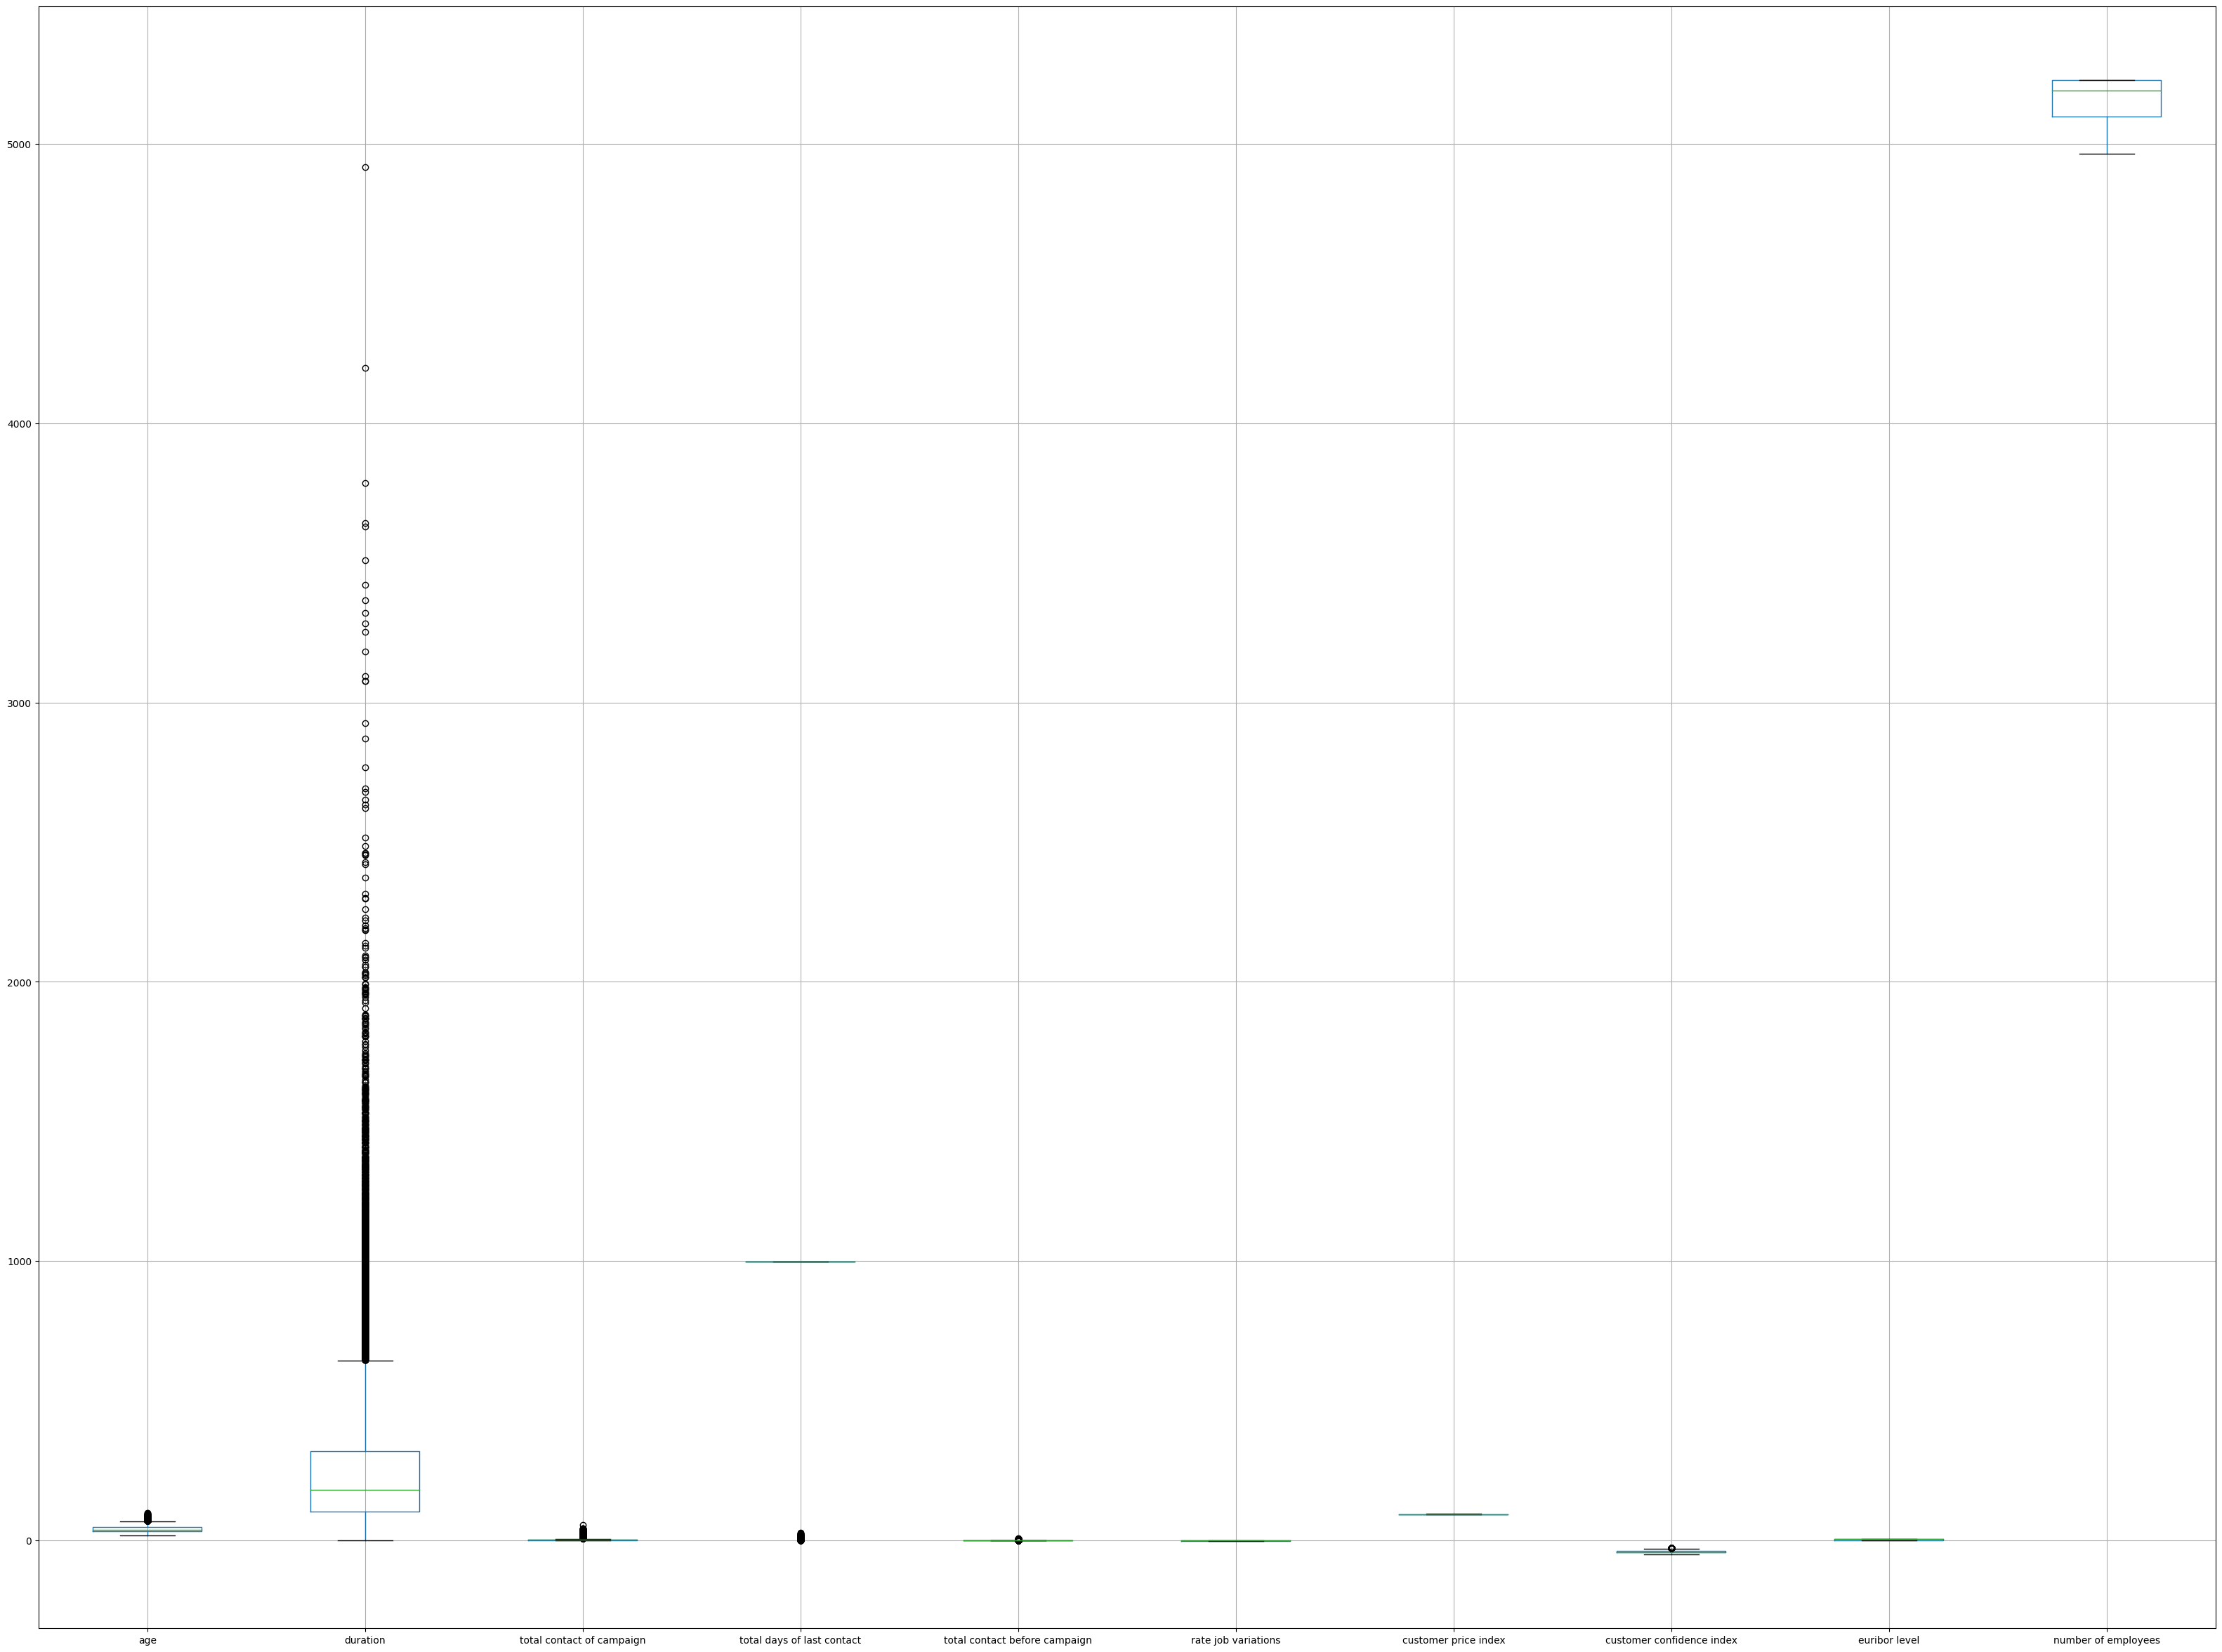

In [20]:
# visualisasi
databank.boxplot(figsize=(40, 30))
plt.show()

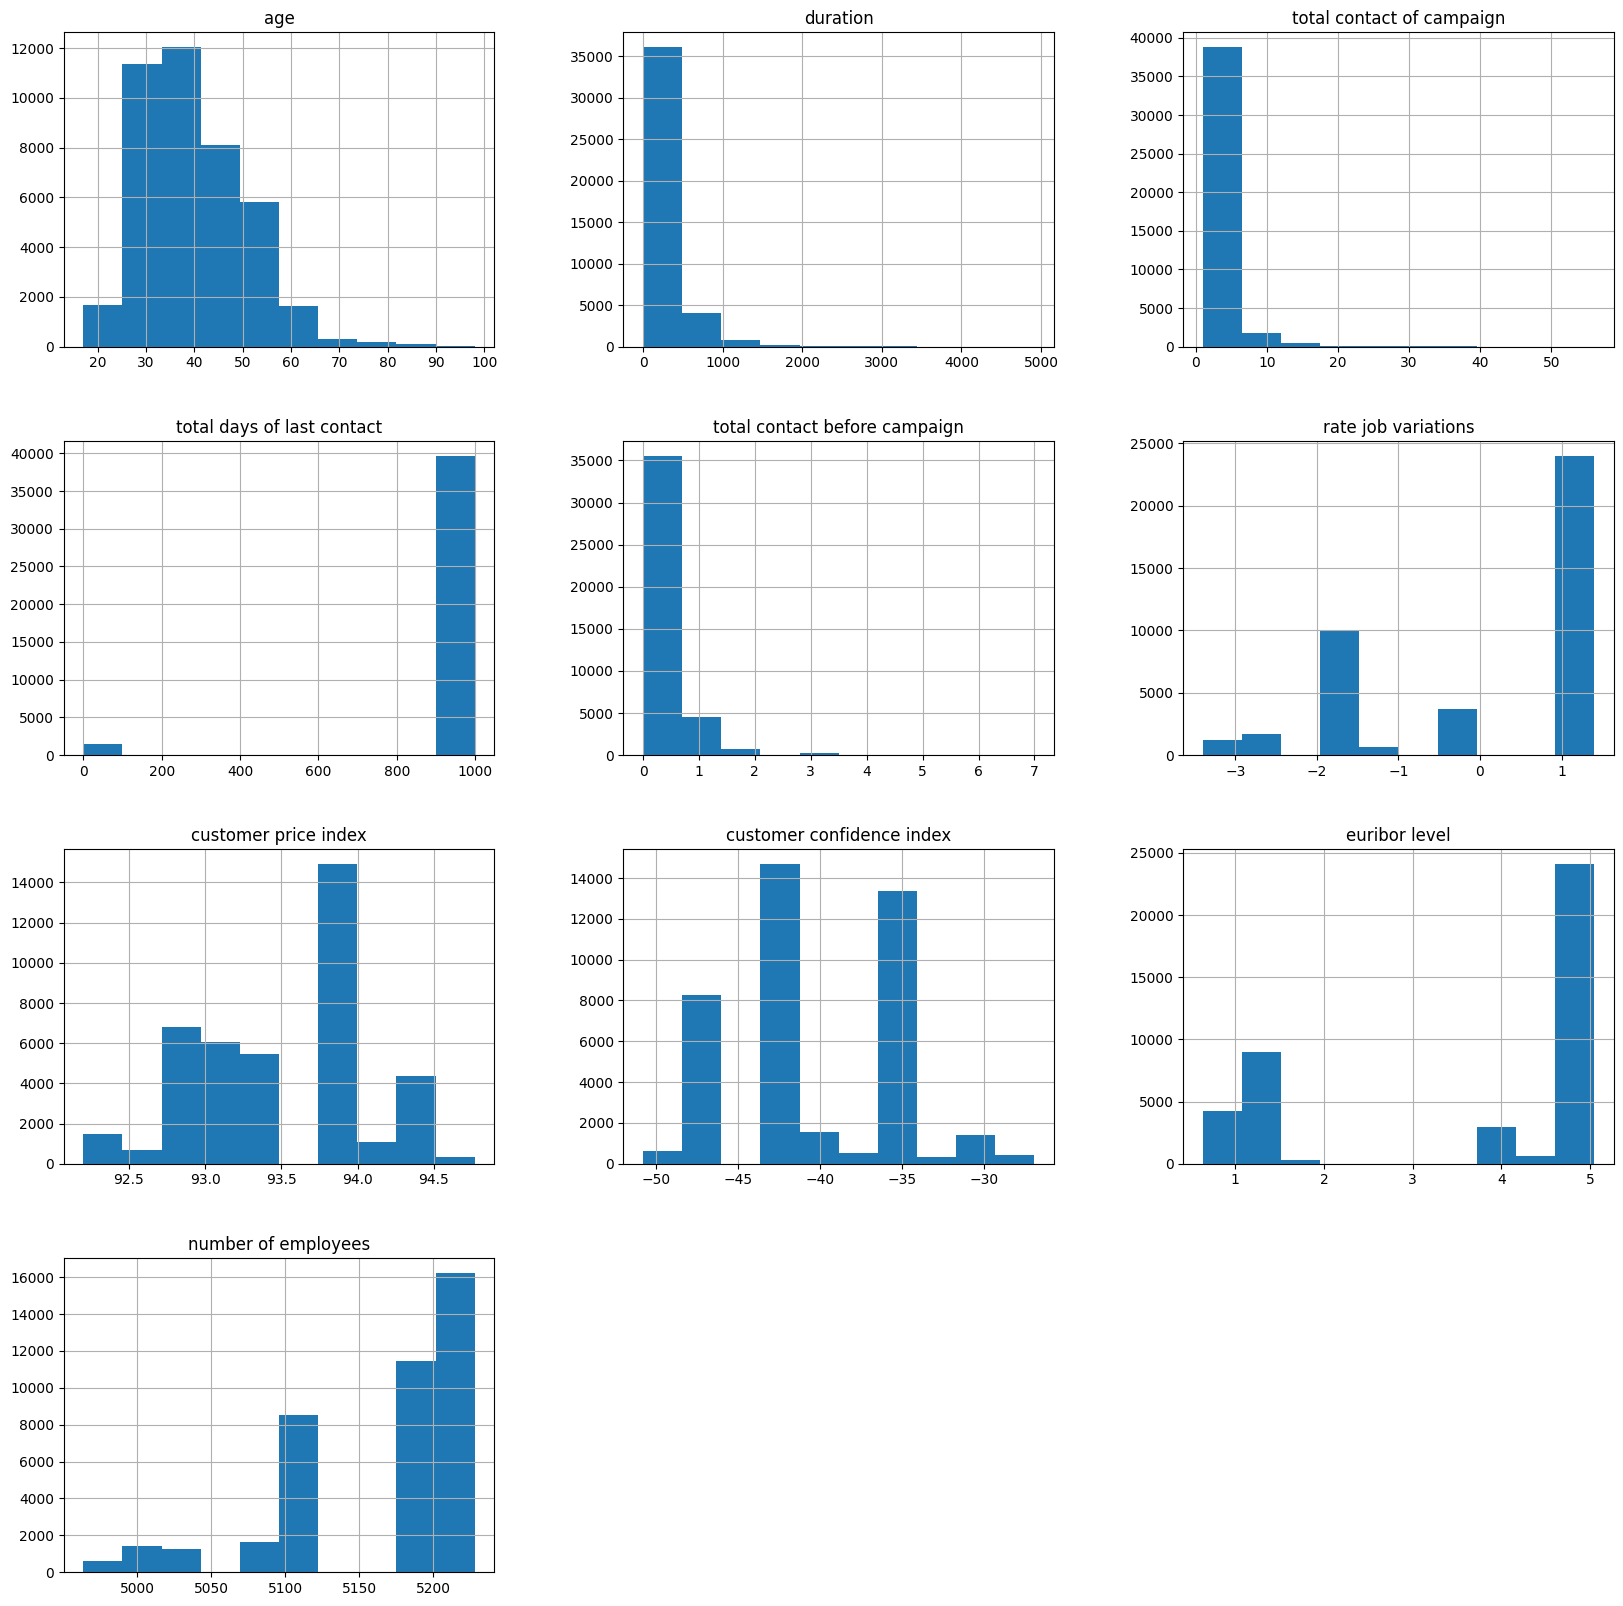

In [21]:
# visualisasi tipe data numerik dengan histogram
databank.hist(figsize=(20, 20))
plt.show()

* melihat berapa persen banyaknya pekerjaan pada data yang dipertimbangkan dalam databank

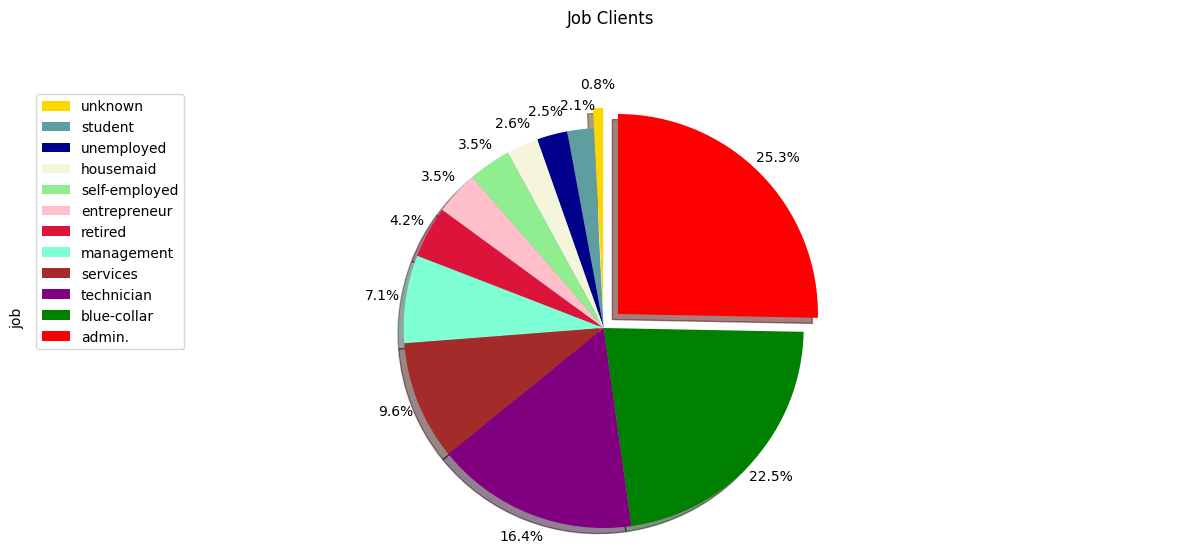

In [22]:
# membuat visualisai pie chart pada job
data1=databank['job'].value_counts().sort_values()
# memilih warna
colors_list = ['gold', 'cadetblue', 'darkblue',
               'beige', 'lightgreen', 'pink',
               'crimson', 'aquamarine','brown', 'purple',
               'green','red']

# mengatur isi tampilan pie
explode_list = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1]

data1.plot(kind='pie',
               figsize=(15, 6),
               autopct='%1.1f%%',
               startangle=90,
               shadow=True,
               labels=None,
               colors=colors_list,
               pctdistance=1.12,
               explode=explode_list)

# judul pie chart
plt.title('Job Clients', y=1.12)

plt.axis('equal')
plt.legend(labels=data1.index, loc='upper left')
# menampilkan
plt.show()

* membandingkan banyak data pekerjaan dan pilihan mengambil deposit 

In [23]:
# melihat data dari status clients dan deposit
data_job = pd.DataFrame(databank.groupby(["job"])["deposit"].value_counts().sort_values())
data_job

,,deposit
job,deposit,
unknown,yes,37
housemaid,yes,106
entrepreneur,yes,124
unemployed,yes,144
self-employed,yes,149
student,yes,275
unknown,no,293
services,yes,323
management,yes,328


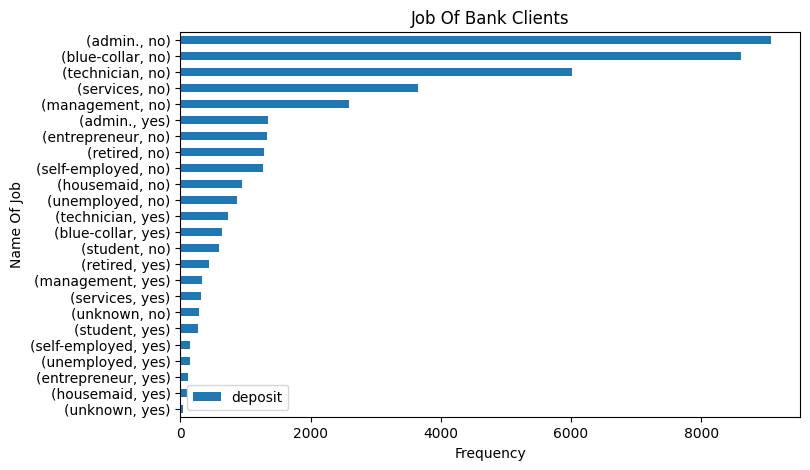

In [24]:
# menampilkan dengan bar horizontal
data_job.plot(kind='barh', figsize=(8,5))
plt.title('Job Of Bank Clients')
plt.xlabel("Frequency")
plt.ylabel("Name Of Job")
plt.show()

* melihat banyanya status clients yang mengambil deposit

In [25]:
# melihat data dari status clients dan deposit
data_marital = pd.DataFrame(databank.groupby(["marital"])["deposit"].value_counts().sort_values())
data_marital

deposit
marital  deposit         
unknown  yes           12
         no            68
divorced yes          476
single   yes         1620
married  yes         2531
divorced no          4135
single   no          9944
married  no         22390

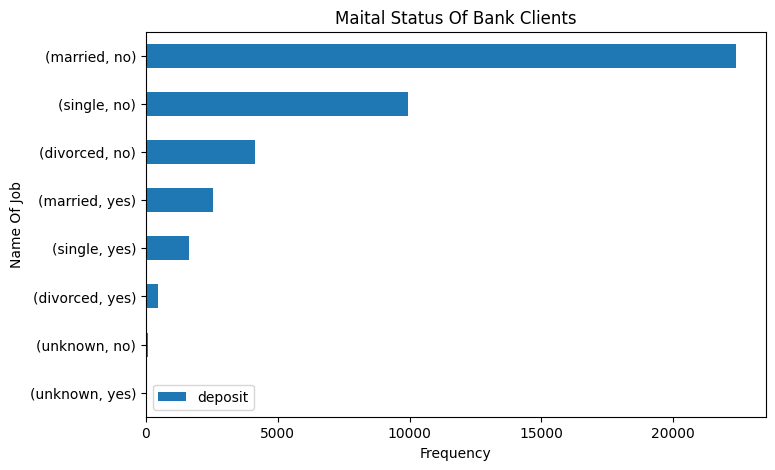

In [26]:
# menampilkan dengan bar horizontal
data_marital.plot(kind='barh', figsize=(8,5))

plt.title('Maital Status Of Bank Clients')
plt.xlabel("Frequency")
plt.ylabel("Name Of Job")
plt.show()

* melihat banyaknya pinjaman clients

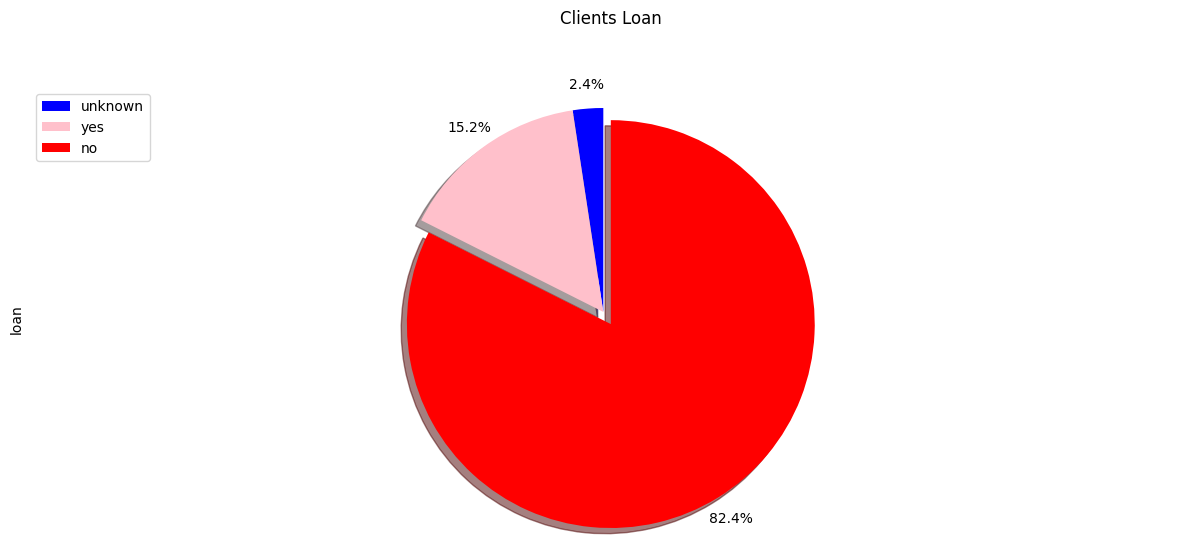

In [27]:
# melihat banyak data pinjaman
data2=databank['loan'].value_counts().sort_values()
data2.head()
# memilih warna untuk masing-masing kategori
colors_list = ['blue','pink','red']

# mengatur tampilan pie
explode_list = [0,0, 0.07]

data2.plot(kind='pie',
               figsize=(15, 6),
               autopct='%1.1f%%',
               startangle=90,
               shadow=True,
               labels=None,
               colors=colors_list,
               pctdistance=1.12,
               explode=explode_list)

# judul
plt.title('Clients Loan', y=1.12)

plt.axis('equal')
plt.legend(labels=data2.index, loc='upper left')
# menampilkan
plt.show()

* melihat banyaknya clients yang memilih untuk deposit pada bank

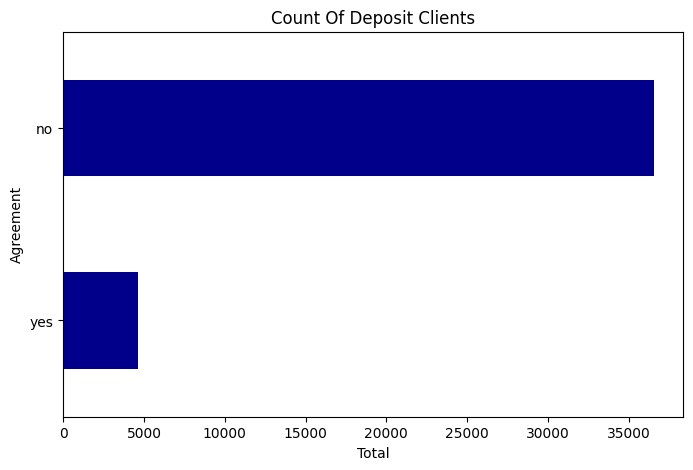

In [28]:
# melihat banyak data persetujuan clients untuk deposit
data3=databank['deposit'].value_counts().sort_values()
# menampilkan visualisai data persetujuan
data3.plot(kind='barh', color = 'darkblue',figsize=(8,5))

plt.title('Count Of Deposit Clients')
plt.xlabel("Total")
plt.ylabel("Agreement")
plt.show()

## Data Prepocessing
-----

### LabelEncoder


In [29]:
# membuat yang berbentuk object menjadi numeric
encode = preprocessing.LabelEncoder()
# membuat label dengan tipe data object
column_cat = ['job', 'marital', 'education', 'credit status', 'credit housing','loan',
            'contact','last contact of month','last contact of week',
            'result of campaign','deposit']

In [30]:
dtbank = databank.copy()
for column in column_cat:
    dtbank[column] = encode.fit_transform(databank[column])

In [31]:
# melihat shape data
dtbank.shape

(41176, 21)

In [32]:
# mengecek perubahan pada tipe data setelah dibuat encoder
dtbank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41176 non-null  int64  
 1   job                            41176 non-null  int64  
 2   marital                        41176 non-null  int64  
 3   education                      41176 non-null  int64  
 4   credit status                  41176 non-null  int64  
 5   credit housing                 41176 non-null  int64  
 6   loan                           41176 non-null  int64  
 7   contact                        41176 non-null  int64  
 8   last contact of month          41176 non-null  int64  
 9   last contact of week           41176 non-null  int64  
 10  duration                       41176 non-null  int64  
 11  total contact of campaign      41176 non-null  int64  
 12  total days of last contact     41176 non-null 

In [33]:
# menampilkan data
dtbank.head()

,age,job,marital,education,credit status,credit housing,loan,contact,last contact of month,last contact of week,duration,total contact of campaign,total days of last contact,total contact before campaign,result of campaign,rate job variations,customer price index,customer confidence index,euribor level,number of employees,deposit
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


### Scaler
##### Menskalakan data numerik kami untuk menghindari kehadiran outlier yang dapat secara signifikan mempengaruhi model 
------

In [34]:
stand_scaler = preprocessing.StandardScaler()
df_scaler = dtbank.copy()
df_num = databank.select_dtypes(include=['int64','int32','float64'])
for column in df_num.columns:
  df_scaler[column] = stand_scaler.fit_transform(databank[column].values.reshape(-1,1))

In [35]:
df_scaler.head()

,age,job,marital,education,credit status,credit housing,loan,contact,last contact of month,last contact of week,duration,total contact of campaign,total days of last contact,total contact before campaign,result of campaign,rate job variations,customer price index,customer confidence index,euribor level,number of employees,deposit
0,1.533143,3,1,0,0,0,0,1,6,1,0.010352,-0.565963,0.195443,-0.349551,1,0.648101,0.722628,0.886568,0.712463,0.331695,0
1,1.629107,7,1,3,1,0,0,1,6,1,-0.421577,-0.565963,0.195443,-0.349551,1,0.648101,0.722628,0.886568,0.712463,0.331695,0
2,-0.290177,7,1,3,0,2,0,1,6,1,-0.124626,-0.565963,0.195443,-0.349551,1,0.648101,0.722628,0.886568,0.712463,0.331695,0
3,-0.002284,0,1,1,0,0,0,1,6,1,-0.413864,-0.565963,0.195443,-0.349551,1,0.648101,0.722628,0.886568,0.712463,0.331695,0
4,1.533143,7,1,3,0,0,2,1,6,1,0.187751,-0.565963,0.195443,-0.349551,1,0.648101,0.722628,0.886568,0.712463,0.331695,0


* melihat keterkaitan antar kolom dalam pengaruh untuk menganalisis data

In [36]:
df_scaler.corr()

,age,job,marital,education,credit status,credit housing,loan,contact,last contact of month,last contact of week,duration,total contact of campaign,total days of last contact,total contact before campaign,result of campaign,rate job variations,customer price index,customer confidence index,euribor level,number of employees,deposit
age,1.000000,0.001270,-0.389829,-0.117960,0.164939,-0.001477,-0.007359,0.006917,-0.025023,-0.017614,-0.000808,0.004622,-0.034381,0.024379,0.019750,-0.000242,0.001009,0.129075,0.010852,-0.017607,0.030381
job,0.001270,1.000000,0.027829,0.134159,-0.028282,0.006873,-0.010161,-0.025054,-0.033007,-0.000868,-0.006408,-0.006865,-0.028494,0.021007,0.011485,-0.008443,-0.016122,0.052802,-0.008024,-0.019728,0.025248
marital,-0.389829,0.027829,1.000000,0.109195,-0.079432,0.010499,0.005806,-0.054527,-0.007622,0.002174,0.010278,-0.007189,-0.037955,0.038708,0.001905,-0.084142,-0.057431,-0.033821,-0.091881,-0.086134,0.046249
education,-0.117960,0.134159,0.109195,1.000000,-0.186811,0.016891,0.006441,-0.105722,-0.082739,-0.017989,-0.015086,0.000406,-0.046656,0.038880,0.016987,-0.043695,-0.081499,0.078789,-0.036321,-0.041455,0.057776
credit status,0.164939,-0.028282,-0.079432,-0.186811,1.000000,-0.015790,-0.003823,0.135275,-0.015787,-0.008660,-0.011805,0.032809,0.080086,-0.102458,0.023437,0.203257,0.168076,0.026502,0.195335,0.189846,-0.099364
credit housing,-0.001477,0.006873,0.010499,0.016891,-0.015790,1.000000,0.044272,-0.082098,-0.018050,0.003339,-0.007688,-0.011074,-0.010539,0.021293,-0.011771,-0.060248,-0.080579,-0.033665,-0.059283,-0.045892,0.011613
loan,-0.007359,-0.010161,0.005806,0.006441,-0.003823,0.044272,1.000000,-0.008589,-0.005738,-0.009345,-0.000970,0.005119,0.000371,-0.001374,-0.001486,0.001840,-0.002474,-0.012002,0.000125,0.003910,-0.004922
contact,0.006917,-0.025054,-0.054527,-0.105722,0.135275,-0.082098,-0.008589,1.000000,0.276499,-0.009614,-0.026665,0.077387,0.117999,-0.212903,0.118773,0.393730,0.591596,0.251575,0.399892,0.269285,-0.144774
last contact of month,-0.025023,-0.033007,-0.007622,-0.082739,-0.015787,-0.018050,-0.005738,0.276499,1.000000,0.027683,0.003637,-0.062128,-0.047885,0.103151,-0.065010,-0.178724,-0.004183,0.009551,-0.117216,-0.221370,-0.006051
last contact of week,-0.017614,-0.000868,0.002174,-0.017989,-0.008660,0.003339,-0.009345,-0.009614,0.027683,1.000000,0.021990,-0.038254,-0.009531,-0.004103,0.018733,0.033288,0.005674,0.041405,0.039064,0.028414,0.015970


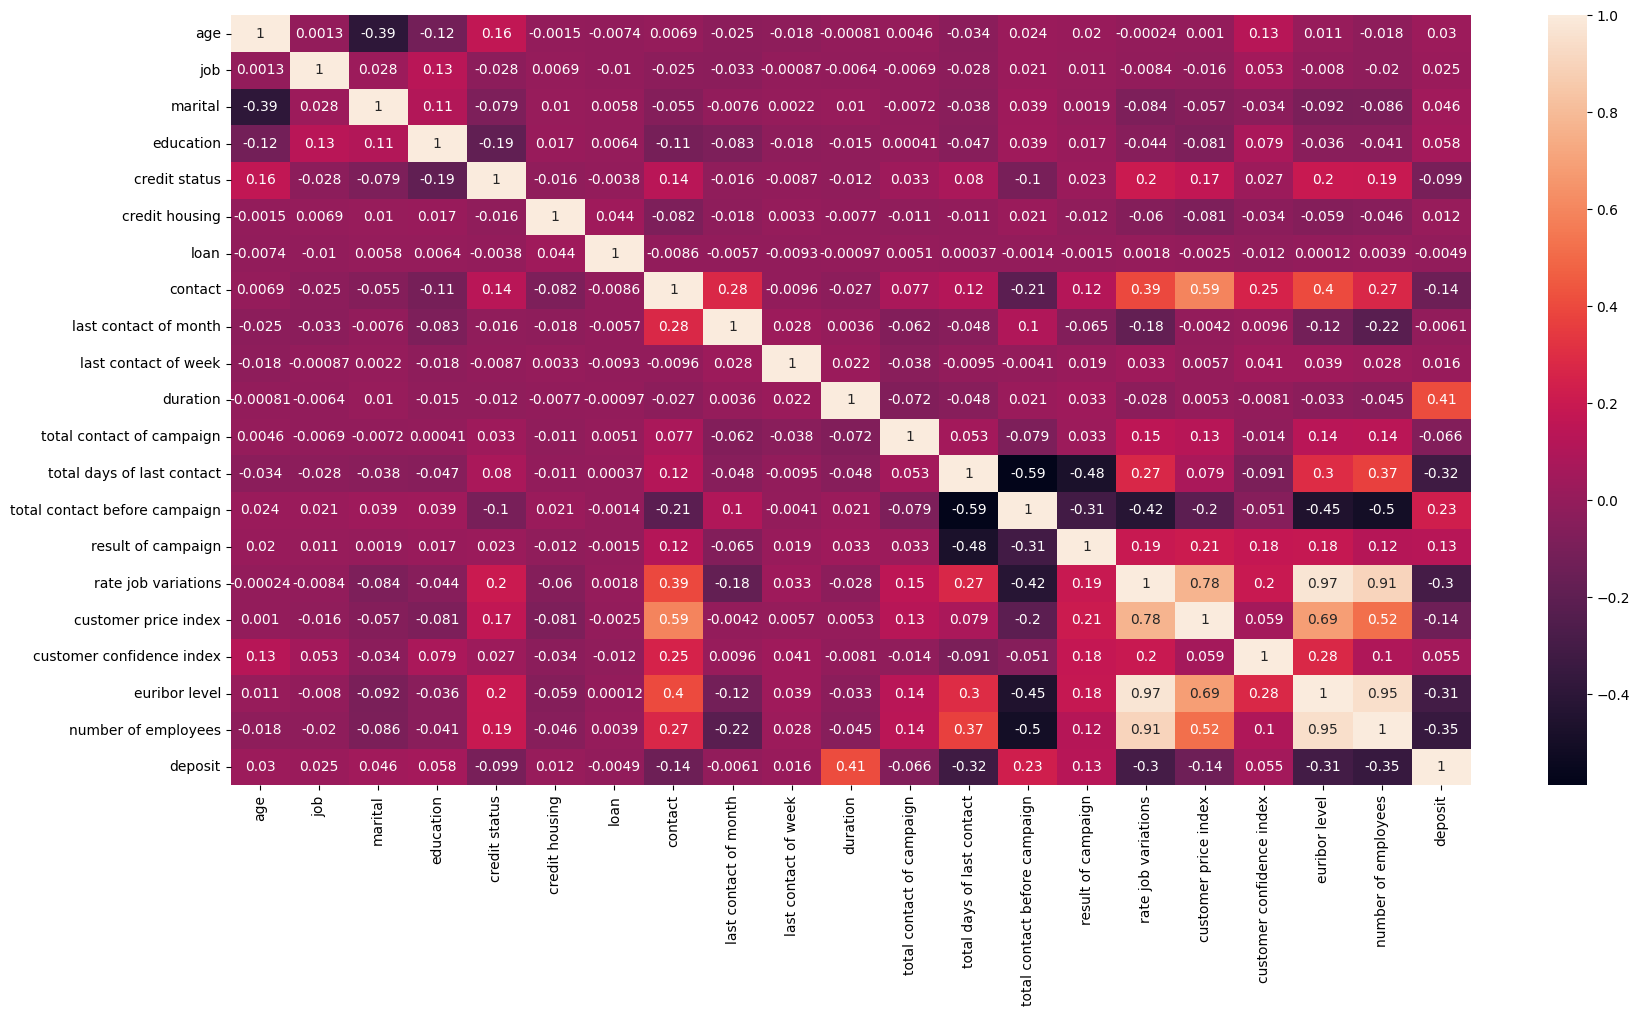

In [37]:
# menapilkan data heatmap
plt.figure(figsize=(20, 10))
ax = sns.heatmap(df_scaler.corr(), annot=True)

* berdasarkan visualisasi korelasi di atas menunjukkan bahwa data yang memiliki korelasi rendah yaitu number of employees, total days of last contact, euribor level, dan rate job variations.

### Membuat data untuk memisahkan Feature dan Target
--------

In [38]:
# memeilih Features
X = df_scaler.drop('deposit', axis=1)

In [39]:
# memilih Target
y = df_scaler['deposit']

### Split Dataset untuk data traning dan data test 
----

- Ukuran = 70:30


In [40]:
# membuat set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, 
                                                    shuffle = True, 
                                                    test_size=0.3, 
                                                    random_state=1)


print('Shape training feature:', X_train.shape)
print('Shape testing feature:', X_test.shape)
print('Shape training label:', y_train.shape)
print('Shape training label:', y_test.shape)

Shape training feature: (28823, 20)
Shape testing feature: (12353, 20)
Shape training label: (28823,)
Shape training label: (12353,)


### Logistic regression
-----

In [41]:
# membuat logistic regression
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)

# train the model menggunakan training sets
log_reg_model.fit(X_train, y_train)

# Prediksi respon untuk test dataset
y_pred_lr = log_reg_model.predict(X_test)

# melihat accuracy score
accuracy_score_log = accuracy_score(y_test,y_pred_lr)

print(classification_report(y_test,y_pred_lr))
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10967
           1       0.66      0.43      0.52      1386

    accuracy                           0.91     12353
   macro avg       0.79      0.70      0.74     12353
weighted avg       0.90      0.91      0.90     12353

Accuracy: 0.9108718529911762


In [42]:
# hyperparametres untuk logistic regression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# menemukan models and parameters
model = LogisticRegression(max_iter=1000)
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# menemukan grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# kesimpulan hasil
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.909748 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.909655 (0.003889) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.909655 (0.003889) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.909655 (0.003898) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.909667 (0.003877) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.909667 (0.003877) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.909632 (0.003902) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.909586 (0.003953) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.909586 (0.003953) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.909574 (0.003903) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.909748 (0.003980) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.909748 (0.003980) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.909701 (0.003859) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.909401 (0.004308) wit

In [43]:
# membuat logistic regression
log_reg_model_new = LogisticRegression(C= 0.1, penalty= 'l2', solver= 'newton-cg', max_iter=1000)

# Train the model menggunkan the training sets
log_reg_model_new.fit(X_train, y_train)

# prediksi the response untuk test dataset
y_pred_lr_new = log_reg_model_new.predict(X_test)

# melihat accuracy score
accuracy_score_log_new = accuracy_score(y_test, y_pred_lr_new)

print(classification_report(y_test, y_pred_lr_new))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lr_new))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10967
           1       0.66      0.43      0.52      1386

    accuracy                           0.91     12353
   macro avg       0.80      0.70      0.74     12353
weighted avg       0.90      0.91      0.90     12353

Accuracy: 0.911438516959443


- Precision: mengukur tingkat ketepatan dari prediksi model dalam mengklasifikasikan suatu data ke dalam suatu kelas. Precision untuk kelas 0 adalah 0,93, artinya 93% dari data yang diprediksi sebagai kelas 0 benar-benar termasuk ke dalam kelas 0. Sedangkan precision untuk kelas 1 adalah 0,66, artinya 66% dari data yang diprediksi sebagai kelas 1 benar-benar termasuk ke dalam kelas 1.

- Recall: mengukur tingkat kemampuan model dalam mengidentifikasi seluruh data pada suatu kelas. Recall untuk kelas 0 adalah 0,97, artinya 97% dari keseluruhan data yang termasuk ke dalam kelas 0 berhasil diidentifikasi dengan benar oleh model. Sedangkan recall untuk kelas 1 adalah 0,43, artinya hanya 43% dari seluruh data pada kelas 1 yang berhasil diidentifikasi oleh model.

- F1-score: merupakan harmonic mean dari precision dan recall, berguna untuk mengevaluasi performa model secara keseluruhan. F1-score untuk kelas 0 adalah 0,95 dan untuk kelas 1 adalah 0,52.

- Support: jumlah data yang termasuk pada masing-masing kelas.

- Accuracy: merupakan proporsi dari data yang berhasil diprediksi secara benar oleh model. Pada kasus ini, akurasi model adalah 0.9109 atau sekitar 91%.

- Macro avg: merupakan rata-rata dari precision, recall, dan f1-score pada seluruh kelas secara merata.

- Weighted avg: merupakan rata-rata dari precision, recall, dan f1-score pada seluruh kelas dengan memperhitungkan jumlah data pada masing-masing kelas.

Berdasarkan hasil output tersebut, dapat disimpulkan bahwa model memiliki performa yang baik dalam mengklasifikasikan data pada kelas 0, namun masih perlu ditingkatkan performanya dalam mengklasifikasikan data pada kelas 1.

### K-Nearest Neighbors
----

In [44]:
# membuat KNN Classifier
knn3 = KNeighborsClassifier(n_neighbors=3)

# Train the model menggunakan training sets
knn3.fit(X_train, y_train)

# prediksi the response untuk  test dataset
y_pred_knn3 = knn3.predict(X_test)

# Import scikit-learn metrics module untuk perhitungan accuracy 
from sklearn import metrics
accuracy_score_knn3 = accuracy_score(y_test,y_pred_knn3)
# melihat model accuracy
print(classification_report(y_test,y_pred_knn3))
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_knn3))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     10967
           1       0.54      0.41      0.46      1386

    accuracy                           0.89     12353
   macro avg       0.73      0.68      0.70     12353
weighted avg       0.88      0.89      0.89     12353

Accuracy: 0.8941147899295717


In [45]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
# fit the model pada train set
g_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [46]:
# menemukan the best score
g_res.best_score_

0.9027512146017361

In [47]:
# mendapatkan hyperparameters dengan score terbaik
g_res.best_params_

{'metric': 'minkowski', 'n_neighbors': 15, 'weights': 'distance'}

In [48]:
# membuat KNN Classifier baru
knn_new = KNeighborsClassifier(n_neighbors=15, metric ='minkowski', weights= 'distance' )

# Train the model menggunakan training sets
knn_new.fit(X_train, y_train)

# prediksi the response untuk test dataset
y_pred_knn_new = knn_new.predict(X_test)

# Import scikit-learn metrics module untuk perhitungan accuracy
from sklearn import metrics
accuracy_score_knn_new = accuracy_score(y_test,y_pred_knn_new)
# melihat model Accuracy
print(classification_report(y_test,y_pred_knn_new))
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_knn_new))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10967
           1       0.64      0.33      0.44      1386

    accuracy                           0.90     12353
   macro avg       0.78      0.66      0.69     12353
weighted avg       0.89      0.90      0.89     12353

Accuracy: 0.9038290293855743


In [49]:
# Meningkatkan hasil akurasi dengan  mencari parameter terbaik bagi KNN
error = []

# menghitung error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error mean')

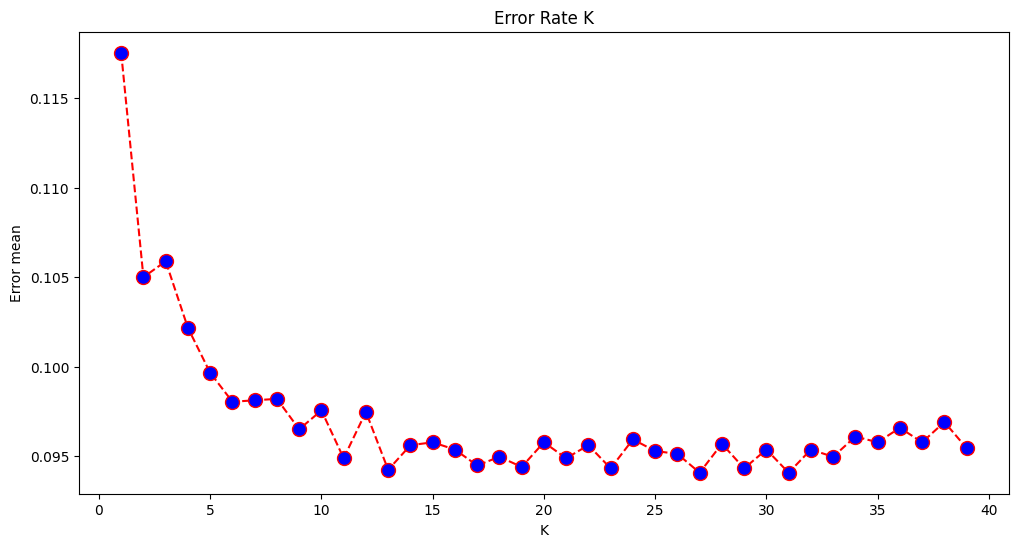

In [50]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K')  
plt.xlabel('K')  
plt.ylabel('Error mean')

* terlihat pada n_neighbors=31 adalah yang terendah

In [51]:
# import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# membuat KNN Classifier dengan n_neighbors baru
knn_new2 = KNeighborsClassifier(n_neighbors=31)

# Train the model menggunakan training sets
knn_new2.fit(X_train, y_train)

# prediksi the response untuk test dataset
y_pred_knn_new2 = knn_new2.predict(X_test)

#Import scikit-learn metrics module untuk perhitungan accuracy
from sklearn import metrics
accuracy_score_knn_new2 = accuracy_score(y_test,y_pred_knn_new2)
# melihat model Accuracy
print(classification_report(y_test,y_pred_knn_new2))
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_knn_new2))


              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10967
           1       0.68      0.30      0.42      1386

    accuracy                           0.91     12353
   macro avg       0.80      0.64      0.68     12353
weighted avg       0.89      0.91      0.89     12353

Accuracy: 0.9059337812677083


- Precision: mengukur tingkat ketepatan dari prediksi model dalam mengklasifikasikan suatu data ke dalam suatu kelas. Precision untuk kelas 0 adalah 0,92, artinya 92% dari data yang diprediksi sebagai kelas 0 benar-benar termasuk ke dalam kelas 0. Sedangkan precision untuk kelas 1 adalah 0,68, artinya 68% dari data yang diprediksi sebagai kelas 1 benar-benar termasuk ke dalam kelas 1.

- Recall: mengukur tingkat kemampuan model dalam mengidentifikasi seluruh data pada suatu kelas. Recall untuk kelas 0 adalah 0,98, artinya 98% dari keseluruhan data yang termasuk ke dalam kelas 0 berhasil diidentifikasi dengan benar oleh model. Sedangkan recall untuk kelas 1 adalah 0,30, artinya hanya 30% dari seluruh data pada kelas 1 yang berhasil diidentifikasi oleh model.

- F1-score: merupakan harmonic mean dari precision dan recall, berguna untuk mengevaluasi performa model secara keseluruhan. F1-score untuk kelas 0 adalah 0,95 dan untuk kelas 1 adalah 0,42.

- Support: jumlah data yang termasuk pada masing-masing kelas.

- Accuracy: merupakan proporsi dari data yang berhasil diprediksi secara benar oleh model. Pada kasus ini, akurasi model adalah 0.91 atau sekitar 91%.

- Macro avg: merupakan rata-rata dari precision, recall, dan f1-score pada seluruh kelas secara merata.

- Weighted avg: merupakan rata-rata dari precision, recall, dan f1-score pada seluruh kelas dengan memperhitungkan jumlah data pada masing-masing kelas.

### Support Vector Machine
----

In [52]:
# membuat SVM model
svm_model = SVC(kernel='linear', C=1)

# Train SVM model
svm_model.fit(X_train, y_train)

# prediksi menggunakan SVM model
y_pred_svm = svm_model.predict(X_test)

# Evaluasi accuracy
accuracy_score_svm = accuracy_score(y_test, y_pred_svm)

print(classification_report(y_test, y_pred_svm))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10967
           1       0.64      0.30      0.41      1386

    accuracy                           0.90     12353
   macro avg       0.78      0.64      0.68     12353
weighted avg       0.89      0.90      0.89     12353

Accuracy: 0.9024528454626407


- Precision: mengukur tingkat ketepatan dari prediksi model dalam mengklasifikasikan suatu data ke dalam suatu kelas. Precision untuk kelas 0 adalah 0,92, artinya 92% dari data yang diprediksi sebagai kelas 0 benar-benar termasuk ke dalam kelas 0. Sedangkan precision untuk kelas 1 adalah 0,64, artinya 64% dari data yang diprediksi sebagai kelas 1 benar-benar termasuk ke dalam kelas 1.

- Recall: mengukur tingkat kemampuan model dalam mengidentifikasi seluruh data pada suatu kelas. Recall untuk kelas 0 adalah 0,98, artinya 98% dari keseluruhan data yang termasuk ke dalam kelas 0 berhasil diidentifikasi dengan benar oleh model. Sedangkan recall untuk kelas 1 adalah 0,30, artinya hanya 30% dari seluruh data pada kelas 1 yang berhasil diidentifikasi oleh model.

- F1-score: merupakan harmonic mean dari precision dan recall, berguna untuk mengevaluasi performa model secara keseluruhan. F1-score untuk kelas 0 adalah 0,95 dan untuk kelas 1 adalah 0,41.

- Support: jumlah data yang termasuk pada masing-masing kelas.

- Accuracy: merupakan proporsi dari data yang berhasil diprediksi secara benar oleh model. Pada kasus ini, akurasi model adalah 0.9024 atau sekitar 90%.

- Macro avg: merupakan rata-rata dari precision, recall, dan f1-score pada seluruh kelas secara merata.

- Weighted avg: merupakan rata-rata dari precision, recall, dan f1-score pada seluruh kelas dengan memperhitungkan jumlah data pada masing-masing kelas.

### Decision Tree
----

In [53]:

# membuat decision tree classifier
dtc_model = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# fit the classifier to the training data
dtc_model.fit(X_train, y_train)

# membuat prediksi pada testing data
y_pred_dt = dtc_model.predict(X_test)

# evaluasi classifier
accuracy_score_dt = accuracy_score(y_test,y_pred_dt)

print(classification_report(y_test,y_pred_dt))
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94     10967
           1       0.55      0.70      0.61      1386

    accuracy                           0.90     12353
   macro avg       0.75      0.81      0.78     12353
weighted avg       0.91      0.90      0.91     12353

Accuracy: 0.9007528535578402


In [54]:
from sklearn.model_selection import GridSearchCV

# membuat parameter berdasarkan random search 
dt = DecisionTreeClassifier(max_depth=3)
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [55]:
# menginisiasi grid pencarian model
grid_search2 = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [56]:
dec_res=grid_search2.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


In [57]:
dec_res.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=20)

In [58]:
dec_res.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 20}

* evaluasi hyperparameter baru

In [59]:
# membuat model decision tree classifier
dtc_model_new = DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_leaf= 20)

# fit the classifier to the training data
dtc_model_new.fit(X_train, y_train)

# membuat prediksi pada testing data
y_pred_dt_new = dtc_model_new.predict(X_test)

# evaluasi classifier
accuracy_score_dt_new = accuracy_score(y_test,y_pred_dt_new)

print(classification_report(y_test,y_pred_dt_new))
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_dt_new))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     10967
           1       0.63      0.59      0.61      1386

    accuracy                           0.91     12353
   macro avg       0.79      0.77      0.78     12353
weighted avg       0.91      0.91      0.91     12353

Accuracy: 0.9145146927871772


- Precision: mengukur tingkat ketepatan dari prediksi model dalam mengklasifikasikan suatu data ke dalam suatu kelas. Precision untuk kelas 0 adalah 0,95, artinya 95% dari data yang diprediksi sebagai kelas 0 benar-benar termasuk ke dalam kelas 0. Sedangkan precision untuk kelas 1 adalah 0,63, artinya 63% dari data yang diprediksi sebagai kelas 1 benar-benar termasuk ke dalam kelas 1.

- Recall: mengukur tingkat kemampuan model dalam mengidentifikasi seluruh data pada suatu kelas. Recall untuk kelas 0 adalah 0,96, artinya 96% dari keseluruhan data yang termasuk ke dalam kelas 0 berhasil diidentifikasi dengan benar oleh model. Sedangkan recall untuk kelas 1 adalah 0,59, artinya hanya 59% dari seluruh data pada kelas 1 yang berhasil diidentifikasi oleh model.

- F1-score: merupakan harmonic mean dari precision dan recall, berguna untuk mengevaluasi performa model secara keseluruhan. F1-score untuk kelas 0 adalah 0,95 dan untuk kelas 1 adalah 0,61.

- Support: jumlah data yang termasuk pada masing-masing kelas.

- Accuracy: merupakan proporsi dari data yang berhasil diprediksi secara benar oleh model. Pada kasus ini, akurasi model adalah 0.91 atau sekitar 91%.

- Macro avg: merupakan rata-rata dari precision, recall, dan f1-score pada seluruh kelas secara merata.

- Weighted avg: merupakan rata-rata dari precision, recall, dan f1-score pada seluruh kelas dengan memperhitungkan jumlah data pada masing-masing kelas.

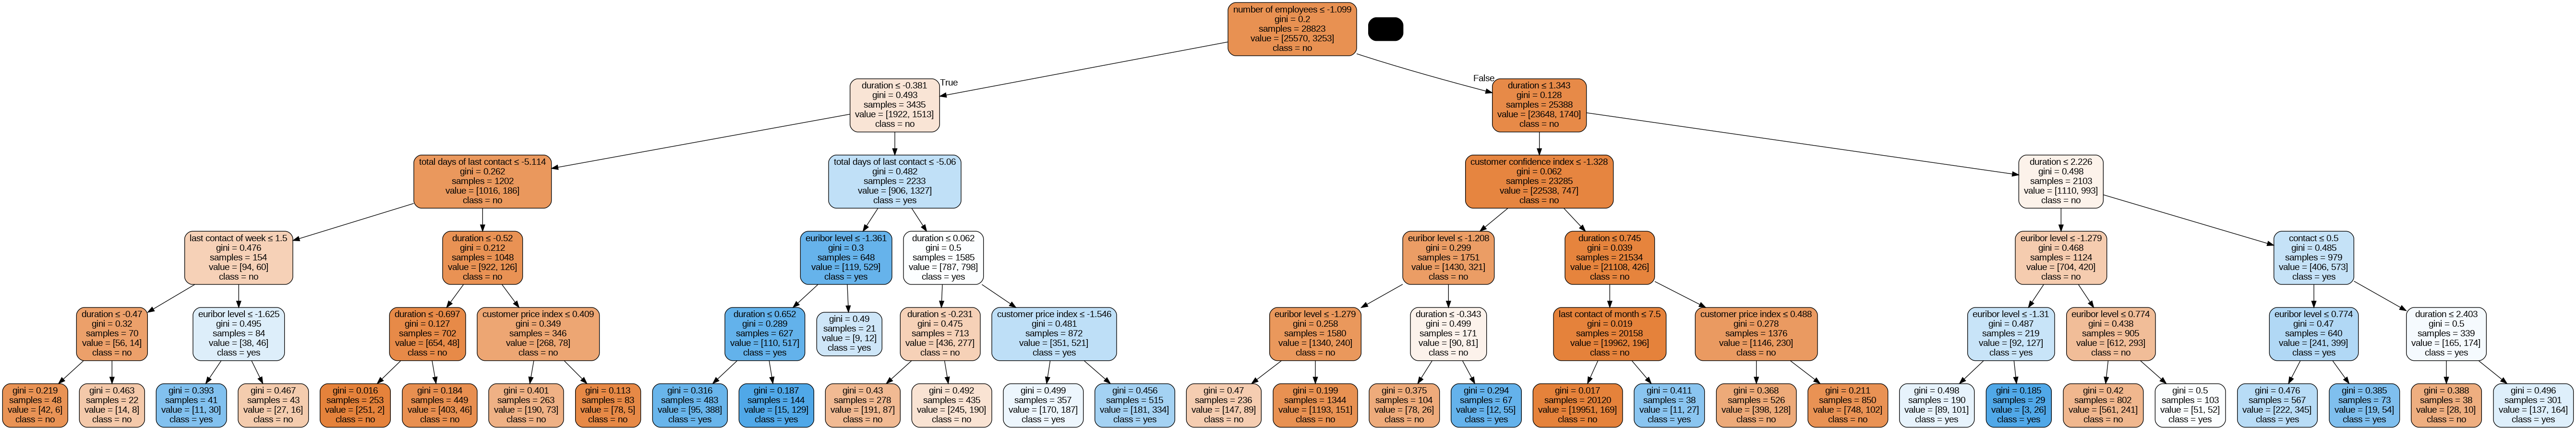

In [60]:
# Visualisasi 
import sklearn.tree as tree
import pydotplus
from six import StringIO 
from IPython.display import Image

feat_col2 = ['age', 'job', 'marital', 'education', 'credit status', 'credit housing',
       'loan', 'contact', 'last contact of month', 'last contact of week',
       'duration', 'total contact of campaign', 'total days of last contact',
       'total contact before campaign', 'result of campaign',
       'rate job variations', 'customer price index',
       'customer confidence index', 'euribor level', 'number of employees']
dot_data = StringIO()
tree.export_graphviz(dtc_model_new, 
    out_file=dot_data, 
    class_names=['no','yes'], # the target names.
    feature_names=feat_col2, # the feature names.
    filled=True, # Whether to fill in the boxes with colours.
    rounded=True, # Whether to round the corners of the boxes.
    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

### Random Forest
----

In [61]:
# membuat random forest classifier
randomfor_model = RandomForestClassifier()
# fit the classifier pada training data
randomfor_model.fit(X_train, y_train)
# membuat prediksi pada testing data
y_pred_rf = randomfor_model.predict(X_test)
# evaluasi classifier
accuracy_score_rf = accuracy_score(y_test,y_pred_rf)

print(classification_report(y_test,y_pred_rf))
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_rf))


              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10967
           1       0.64      0.52      0.57      1386

    accuracy                           0.91     12353
   macro avg       0.79      0.74      0.76     12353
weighted avg       0.91      0.91      0.91     12353

Accuracy: 0.9133813648506436


* membuat hyperparamter random forest

In [62]:
model_random = RandomForestClassifier()
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

In [63]:
grid_search_random = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid,cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [64]:
random_res= grid_search_random.fit(X_train, y_train)

Fitting 4 folds for each of 108 candidates, totalling 432 fits


In [65]:
print(random_res.best_estimator_)

RandomForestClassifier(max_depth=6, max_features=None, max_leaf_nodes=9,
                       n_estimators=25)


In [66]:
# membuat random forest classifier
randomfor_model_new = RandomForestClassifier(max_depth=9, max_features=None, max_leaf_nodes=9)
# fit the classifier pada training data
randomfor_model_new.fit(X_train, y_train)
# membuat prediksi pada testing data
y_pred_rf_new = randomfor_model_new.predict(X_test)
# evaluasi classifier
accuracy_score_rf_new = accuracy_score(y_test,y_pred_rf_new)

print(classification_report(y_test,y_pred_rf_new))
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_rf_new))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10967
           1       0.64      0.52      0.57      1386

    accuracy                           0.91     12353
   macro avg       0.79      0.74      0.76     12353
weighted avg       0.91      0.91      0.91     12353

Accuracy: 0.9131385088642435


- Precision: mengukur tingkat ketepatan dari prediksi model dalam mengklasifikasikan suatu data ke dalam suatu kelas. Precision untuk kelas 0 adalah 0,94, artinya 94% dari data yang diprediksi sebagai kelas 0 benar-benar termasuk ke dalam kelas 0. Sedangkan precision untuk kelas 1 adalah 0,64, artinya 64% dari data yang diprediksi sebagai kelas 1 benar-benar termasuk ke dalam kelas 1.

- Recall: mengukur tingkat kemampuan model dalam mengidentifikasi seluruh data pada suatu kelas. Recall untuk kelas 0 adalah 0,96, artinya 96% dari keseluruhan data yang termasuk ke dalam kelas 0 berhasil diidentifikasi dengan benar oleh model. Sedangkan recall untuk kelas 1 adalah 0,52, artinya hanya 52% dari seluruh data pada kelas 1 yang berhasil diidentifikasi oleh model.

- F1-score: merupakan harmonic mean dari precision dan recall, berguna untuk mengevaluasi performa model secara keseluruhan. F1-score untuk kelas 0 adalah 0,95 dan untuk kelas 1 adalah 0,57.

- Support: jumlah data yang termasuk pada masing-masing kelas.

- Accuracy: merupakan proporsi dari data yang berhasil diprediksi secara benar oleh model. Pada kasus ini, akurasi model adalah 0.91 atau sekitar 91%.

- Macro avg: merupakan rata-rata dari precision, recall, dan f1-score pada seluruh kelas secara merata.

- Weighted avg: merupakan rata-rata dari precision, recall, dan f1-score pada seluruh kelas dengan memperhitungkan jumlah data pada masing-masing kelas.

### Naive Bayes
----

In [67]:
# Membuat Gaussian Classifier
gnb_model = GaussianNB()

# Train model menggunakan training sets
gnb_model.fit(X_train, y_train)

# prediksi response untuk test dataset
y_pred_gnb = gnb_model.predict(X_test)

accuracy_score_gnb = accuracy_score(y_test,y_pred_gnb)

# Import scikit-learn metrics module untuk perhitungan akurasi
from sklearn import metrics

# melihat model accuracy
print(classification_report(y_test,y_pred_gnb))
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_gnb))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91     10967
           1       0.38      0.60      0.46      1386

    accuracy                           0.85     12353
   macro avg       0.66      0.74      0.69     12353
weighted avg       0.88      0.85      0.86     12353

Accuracy: 0.8451388326722253


* membuat hyperparameter Naive Bayes

In [68]:
np.logspace(0,-9, num=10)

array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09])

In [69]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

In [70]:
model_gnb_new = GaussianNB()
model_gnb_new.fit(X_train, y_train)
parameters = {
  'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
}
cv_model = GridSearchCV(estimator=model_gnb_new, param_grid=parameters, cv=5, verbose=1, scoring='accuracy')
cv_model.fit(X_train, y_train)
cv_model.best_params_

Fitting 5 folds for each of 14 candidates, totalling 70 fits


{'var_smoothing': 0.01}

In [71]:
model_gs_new = GaussianNB(var_smoothing=0.01)
model_gs_new.fit(X_train, y_train)

GaussianNB(var_smoothing=0.01)

In [72]:
y_predict_gnb_new = model_gs_new.predict(X_test)
accuracy_score_gnb_new = accuracy_score(y_test, y_predict_gnb_new)
# Model Accuracy
print(classification_report(y_test, y_predict_gnb_new))
print("Accuracy:",metrics.accuracy_score(y_test, y_predict_gnb_new))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92     10967
           1       0.43      0.55      0.48      1386

    accuracy                           0.87     12353
   macro avg       0.68      0.73      0.70     12353
weighted avg       0.88      0.87      0.87     12353

Accuracy: 0.8674006314255647


- Precision: mengukur tingkat ketepatan dari prediksi model dalam mengklasifikasikan suatu data ke dalam suatu kelas. Precision untuk kelas 0 adalah 0,94, artinya 94% dari data yang diprediksi sebagai kelas 0 benar-benar termasuk ke dalam kelas 0. Sedangkan precision untuk kelas 1 adalah 0,43, artinya 43% dari data yang diprediksi sebagai kelas 1 benar-benar termasuk ke dalam kelas 1.

- Recall: mengukur tingkat kemampuan model dalam mengidentifikasi seluruh data pada suatu kelas. Recall untuk kelas 0 adalah 0,91, artinya 91% dari keseluruhan data yang termasuk ke dalam kelas 0 berhasil diidentifikasi dengan benar oleh model. Sedangkan recall untuk kelas 1 adalah 0,55, artinya hanya 55% dari seluruh data pada kelas 1 yang berhasil diidentifikasi oleh model.

- F1-score: merupakan harmonic mean dari precision dan recall, berguna untuk mengevaluasi performa model secara keseluruhan. F1-score untuk kelas 0 adalah 0,92 dan untuk kelas 1 adalah 0,48.

- Support: jumlah data yang termasuk pada masing-masing kelas.

- Accuracy: merupakan proporsi dari data yang berhasil diprediksi secara benar oleh model. Pada kasus ini, akurasi model adalah 0.87 atau sekitar 87%.

- Macro avg: merupakan rata-rata dari precision, recall, dan f1-score pada seluruh kelas secara merata.

- Weighted avg: merupakan rata-rata dari precision, recall, dan f1-score pada seluruh kelas dengan memperhitungkan jumlah data pada masing-masing kelas.

### Confusion Matrix
----

* logistic regression

In [73]:
matrix_logr=confusion_matrix(y_test, y_pred_lr_new)
matrix_logr

array([[10660,   307],
       [  787,   599]])

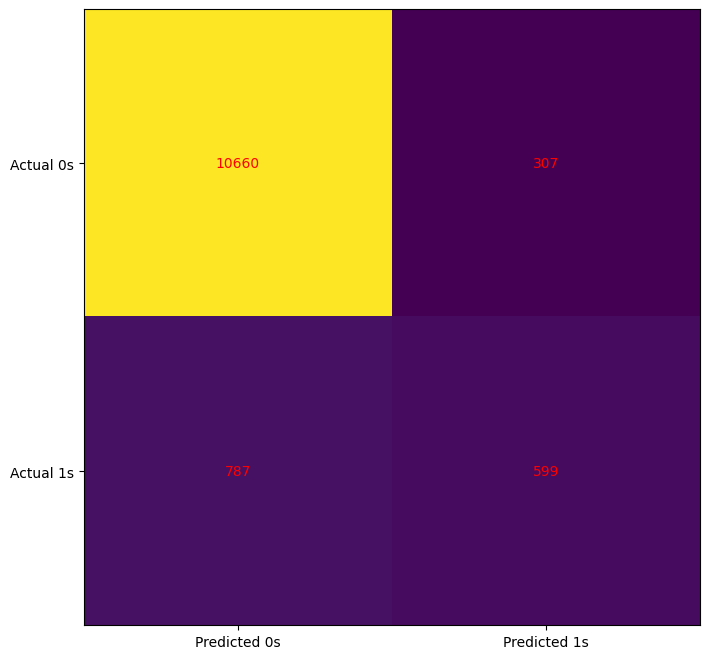

In [74]:
conf_logistic_regression = confusion_matrix(y_test, y_pred_lr_new)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(conf_logistic_regression)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_logistic_regression[i, j], ha='center', va='center', color='red')
plt.show()

Analisis confusion matrix Logistic Regression:
- 10660 true negative pedictions: 10660 pengamatan pertama adalah nol yang diprediksi dengan benar.
-  787 ada prediksi false negatif: Ini adalah prediksi yang salah sebagai nol.
-  307 prediksi false positif: Pengamatan keempat adalah nol yang salah diprediksi sebagai satu.
-  599 prediksi positif yang benar: 599 pengamatan terakhir adalah yang diprediksi dengan benar.

----

- KNN

In [75]:
confusion_matrix(y_test, y_pred_knn_new)

array([[10701,   266],
       [  922,   464]])

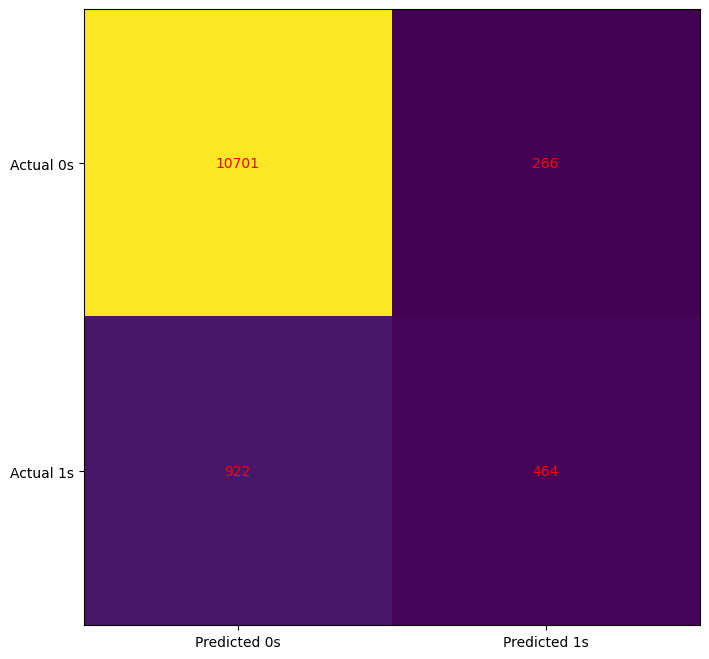

In [76]:
conf_knn_new = confusion_matrix(y_test, y_pred_knn_new)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(conf_knn_new)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_knn_new[i, j], ha='center', va='center', color='red')
plt.show()

Analisis confusion matrix KNN:
- 10771 true negative pedictions: 10771 pengamatan pertama adalah nol yang diprediksi dengan benar.
-  922 ada prediksi false negatif: Ini adalah prediksi yang salah sebagai nol.
-  266 prediksi false positif: Pengamatan keempat adalah nol yang salah diprediksi sebagai satu.
-  464 prediksi positif yang benar: 464 pengamatan terakhir adalah yang diprediksi dengan benar.

----

- SVM

In [77]:
confusion_matrix(y_test, y_pred_svm)

array([[10731,   236],
       [  969,   417]])

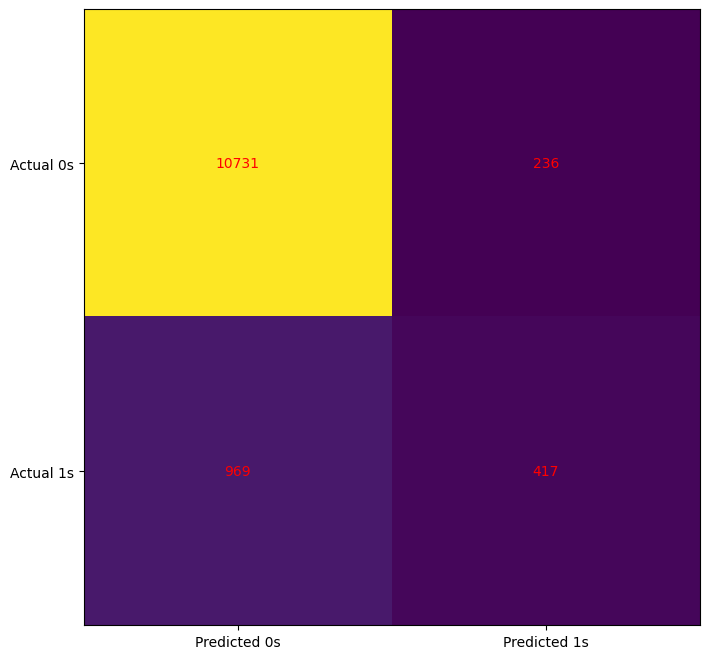

In [78]:
conf_svm = confusion_matrix(y_test, y_pred_svm)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(conf_svm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_svm[i, j], ha='center', va='center', color='red')
plt.show()

Analisis confusion matrix SVM:
- 10731 true negative pedictions: 10731 pengamatan pertama adalah nol yang diprediksi dengan benar.
-  969 ada prediksi false negatif: Ini adalah prediksi yang salah sebagai nol.
-  236 prediksi false positif: Pengamatan keempat adalah nol yang salah diprediksi sebagai satu.
-  417 prediksi positif yang benar: 417 pengamatan terakhir adalah yang diprediksi dengan benar.

----

- Decision Tree

In [79]:
confusion_matrix(y_test, y_pred_dt_new)

array([[10482,   485],
       [  571,   815]])

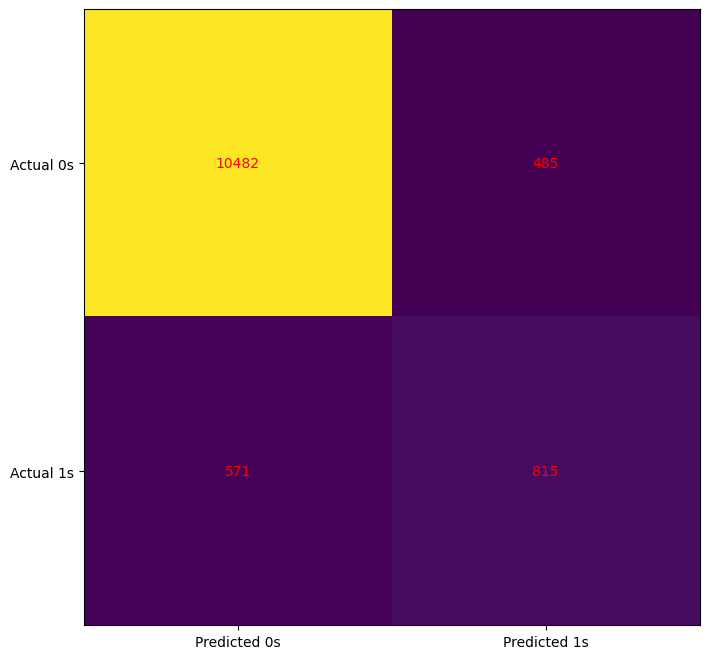

In [80]:
conf_dectree= confusion_matrix(y_test, y_pred_dt_new)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(conf_dectree)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_dectree[i, j], ha='center', va='center', color='red')
plt.show()

Analisis confusion matrix Decision Tree:
- 10482 true negative pedictions: 10482 pengamatan pertama adalah nol yang diprediksi dengan benar.
-  571 ada prediksi false negatif: Ini adalah prediksi yang salah sebagai nol.
-  485 prediksi false positif: Pengamatan keempat adalah nol yang salah diprediksi sebagai satu.
-  815 prediksi positif yang benar: 815 pengamatan terakhir adalah yang diprediksi dengan benar.

----

- Naive bayes

In [81]:
confusion_matrix(y_test, y_predict_gnb_new)

array([[9959, 1008],
       [ 630,  756]])

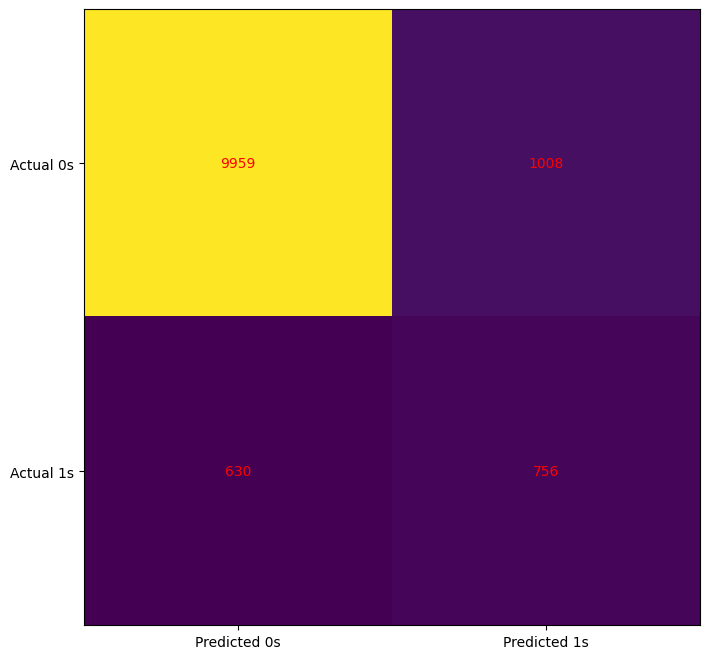

In [82]:
conf_gnb = confusion_matrix(y_test, y_predict_gnb_new)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(conf_gnb)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_gnb[i, j], ha='center', va='center', color='red')
plt.show()

Analisis confusion matrix Naive Bayes:
- 9959 true negative pedictions: 9959 pengamatan pertama adalah nol yang diprediksi dengan benar.
-  630 ada prediksi false negatif: Ini adalah prediksi yang salah sebagai nol.
-  1008 prediksi false positif: Pengamatan keempat adalah nol yang salah diprediksi sebagai satu.
-  756 prediksi positif yang benar: 756 pengamatan terakhir adalah yang diprediksi dengan benar.

- Random Forest

In [83]:
confusion_matrix(y_test, y_pred_rf_new)

array([[10565,   402],
       [  671,   715]])

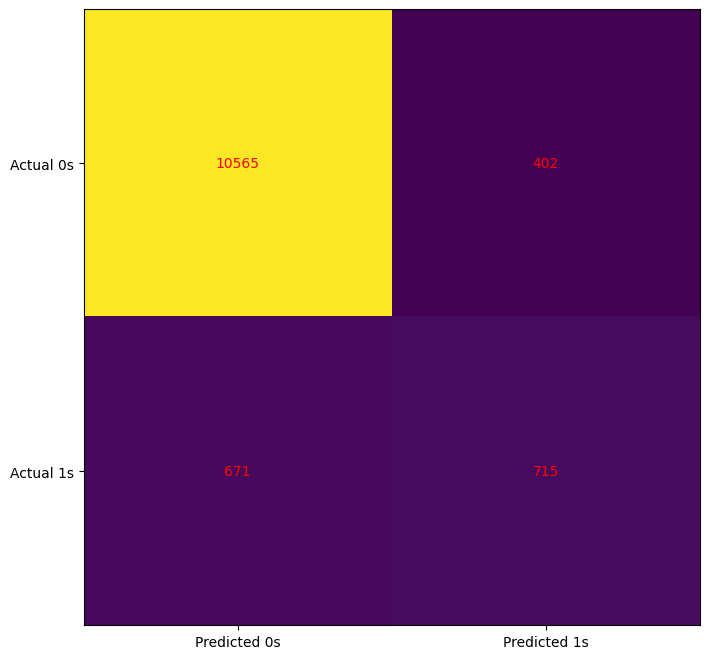

In [84]:
conf_randfor = confusion_matrix(y_test, y_pred_rf_new)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(conf_randfor)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_randfor[i, j], ha='center', va='center', color='red')
plt.show()

Analisis confusion matrix Random Forest:
- 10565 true negative pedictions: 10565 pengamatan pertama adalah nol yang diprediksi dengan benar.
-  671 ada prediksi false negatif: Ini adalah prediksi yang salah sebagai nol.
-  402 prediksi false positif: Pengamatan keempat adalah nol yang salah diprediksi sebagai satu.
-  715 prediksi positif yang benar: 715 pengamatan terakhir adalah yang diprediksi dengan benar.

### Conclusion
-----

In [85]:
# Hasil akurasi dari beberapa model
print('Berikut adalah hasil beberapa akurasi dari model machine learning')
print('The accuration of Logistic Regression:', accuracy_score_log_new)
print('The accuration of K-Nearest Neighbors:', accuracy_score_knn_new2)
print('The accuration of Support Vector Machine:', accuracy_score_svm)
print('The accuration of Decision Tree:', accuracy_score_dt_new)
print('The accuration of Random Forest:', accuracy_score_rf_new)
print('The accuration of Naive Bayes:', accuracy_score_gnb_new)

Berikut adalah hasil beberapa akurasi dari model machine learning
The accuration of Logistic Regression: 0.911438516959443
The accuration of K-Nearest Neighbors: 0.9059337812677083
The accuration of Support Vector Machine: 0.9024528454626407
The accuration of Decision Tree: 0.9145146927871772
The accuration of Random Forest: 0.9131385088642435
The accuration of Naive Bayes: 0.8674006314255647


Berdasarkan akurasi di atas terlihat bahwa akurasi terbaik ditunjukkan oleh model decision tree sebesar 0.9145146927871772 atau 91%. Oleh karena itu model ini dapat digunakan sebagai modelling dengan akurasi yang paling baik.